# Electrocardiograms

👇 Import the `electrocardiograms.csv` dataset located in the data folder and display its first 5 rows

In [63]:
import pandas as pd
electro = pd.read_csv('data/electrocardiograms.csv')
electro['target'].value_counts()
electro.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


Each obervation of the dataset is a numerically represented heartbeat, taken from a patient's electrocardiogram (ECG). The target is binary and defines whether the heartbeat is at risk of cardiovascular disease [1] or not [0]. 


The **task** is to build a model that can **flag at-risk observations**.

## Data Exploration

👇 Visualise an observation of each class to get an idea of what the numbers represent

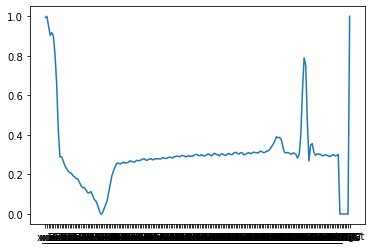

In [64]:
import matplotlib.pyplot as plt
vis = electro.loc[2,:]
plt.plot(vis)

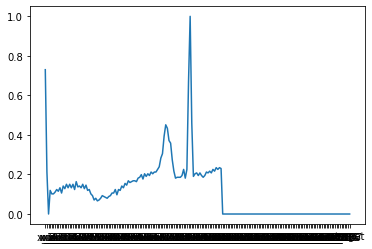

In [65]:
electro_not = electro[electro['target'] < 1]
vis = electro_not.loc[1449,:]
plt.plot(vis)

👇 How many observations of each classes are there?

In [66]:
electro['target'].value_counts()

0    18117
1     1448
Name: target, dtype: int64

##  Logistic Regression

👇 Cross-validate a `LogisticRegression` model and return the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
features = electro.columns[:-1]
X_train, X_test, y_train, y_test = train_test_split(electro[features], electro['target'], test_size = 0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

from sklearn.model_selection import cross_validate, cross_val_predict
cv_results = cross_validate(model, electro[features], electro['target'], cv=5)
display(cv_results)

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Make predictions using a LogisticRegression model
electro['predictions'] = cross_val_predict(model, electro[features], electro['target'])

# Accuracy
print('Accuracy =', round(accuracy_score(electro['target'], electro['predictions']), 3))
# Precision
print('Precision =', round(precision_score(electro['target'], electro['predictions']), 3))
# Recall
print('Recall =', round(recall_score(electro['target'], electro['predictions']), 3))
# F1 score
print('F1 score =', round(f1_score(electro['target'], electro['predictions']), 3))

{'fit_time': array([0.7509644 , 0.81253719, 0.82426214, 0.76839328, 0.81731534]),
 'score_time': array([0.00881958, 0.00921512, 0.00843215, 0.00776243, 0.00703692]),
 'test_score': array([0.9391771 , 0.93892154, 0.93968822, 0.93841043, 0.93994378])}

Accuracy = 0.939
Precision = 0.686
Recall = 0.33
F1 score = 0.446


❓ What is the model's accuracy score?

94% accuracy(!)

❓ What percentage of at-risk heartbeats is the model able to flag?

only 33%

❓ When the model signals an at-risk heartbeat, how often is it correct?

In 69% of cases

❓ What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?

Not great, it flags only 33% of at-risk partients and is incorrect 31% of the time when detecting an at risk patient.

## KNN Classifier

👇 Cross-validate a `KNNClassifier`  model and return the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [97]:
from sklearn.neighbors import KNeighborsClassifier

#Hold out
features = electro.columns[:-1]
X_train, X_test, y_train, y_test = train_test_split(electro.loc[:, 'x_1':'x_187'], electro['target'], test_size = 0.3)

#Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

cv_results = cross_validate(knn, electro[features], electro['target'], cv=5)
display(cv_results)


{'fit_time': array([0.35717392, 0.34357262, 0.34778714, 0.35646486, 0.34525752]),
 'score_time': array([7.83347654, 7.87452459, 8.32018137, 7.8026948 , 8.18753672]),
 'test_score': array([0.99591107, 0.9938666 , 0.99642218, 0.99539995, 0.99463327])}

In [71]:
# Make predictions using a LogisticRegression model
electro['predictions_knn'] = cross_val_predict(knn, electro[features], electro['target'])

# Accuracy
print('Accuracy =', round(accuracy_score(electro['target'], electro['predictions_knn']), 3))
# Precision
print('Precision =', round(precision_score(electro['target'], electro['predictions_knn']), 3))
# Recall
print('Recall =', round(recall_score(electro['target'], electro['predictions_knn']), 3))
# F1 score
print('F1 score =', round(f1_score(electro['target'], electro['predictions_knn']), 3))

Accuracy = 0.996
Precision = 0.984
Recall = 0.955
F1 score = 0.97


❓ What is the model's ability to correctly predict at-risk heartbeats?

This is the precision rate, 98,4%

❓ What is the model's precision/recall tradeoff score?

In [77]:
tradeoff = round(precision_score(electro['target'],\
                                 electro['predictions_knn'])/recall_score(electro['target'], electro['predictions_knn']), 3)

This is the F1 score, 97%

❓ What is the model's percentage of correct predictions?

it is 99.6%

❓ What percentage of the at risk hearbeats is the model able to detect?

This is the recall rate, 95,5%

## Model Selection

❓ Considering your **task** is to **flag at-risk observations** while **limiting false alarms**, which model would you pick?

<details>
<summary>Answer</summary>

You surely have noticed by now that the KNN model is best suited for the task. You also should have noticed that a high accuracy does not necessarily mean a highly performing model. Knowing which metric to observe is key and specific to each task and dataset.

</details>



## Confusion Matrix

👇 Using `plot_confusion_matrix`,  visualize the confusion matrix of the KNN model.

[`plot_confusion_matrix` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

<details>
<summary>💡 Hints</summary>

- `plot_confusion_matrix` takes a trained model as input
    
- You need to go back to the Holdout method
    
- Make sure you generalize
    
- Look into the `normalize` parameter
  
</details>



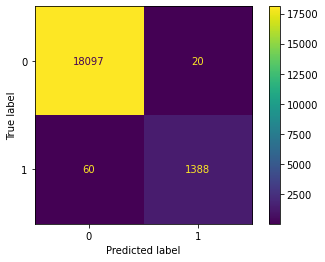

In [82]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, electro[features], electro['target'])


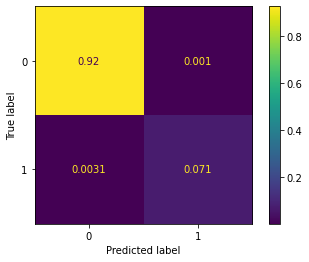

In [83]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, electro[features], electro['target'], normalize = 'all')

❓ How **many** false alarms does the model produce?

<details>
<summary>Answer</summary>
 
The answer is the count of 0's predicted as 1's.
    
</details>


❓ What **percentage** of potentially at risk heartbeats does the model miss out on?

<details>
<summary>💡 Hint</summary>

- Look into the `normalize` parameter 😉
  
</details>



0.3%

<details>
<summary>Answer</summary>
 
The answer is the 1's predicted as 0's as a percentage.
    
</details>


## Prediction

👇 A patient comes to you for a second opinion on what he was told may be an at risk heartbeat. Use your model to get some insight.

In [99]:
new_data = pd.read_csv('data/new_data.csv')

new_data
knn.predict_proba(new_data)

array([[0., 1.]])

⚠️ Please, push your exercice once completed 🙃

# 🏁